# Mathematical Formulation

## Sets

$V$: Set of E-scooters in the system = {1, 2, ..., V}

$S$: Set of Chargers in the system = {1, 2, ..., S}

## Indices

$i$: An E-scooter in V. $\quad$ $i \in V$

$k$: An Charger in S. $\quad$ $k \in S$


## Data

$d_{ik}$: Distance between E-scooter $i$ and Charger $k$

$D_k$: Maximum Number of E-scooters that can be assigned to Charger $k$

$b_k$: Penalty (Cost) of Using one charger $k$

$B$: Total Investment for joining all Chargers

## Decision Variables

$z_{ik} =
\begin{cases}
1: & \text{if E-scooter } i \text{ is assigned to Charger } k\\
0: & \text{otherwise}
\end{cases}$

$y_{kk} =
\begin{cases}
1: & \text{if Charger } k \text{ is ready to work at a specific location}\\
0: & \text{otherwise}
\end{cases}$


## Constraints

#### Constraint 1: Each E-scooter $i$ is assigned to exactly 1 Charger $k$.

$\sum_{k \in S} z_{ik} = 1 \quad \forall i \in V$


#### Constraint 2: No E-scooter $i$ is assigned to Charger $k$ unless $k$ is ready to work at a specific location.

$z_{ik} \leq y_{kk} \quad \forall i \in V, \forall k \in S$


#### Constraint 3: Total Costs of joining S chargers are less than or equal to the total investment $B$.

$\sum_{k \in S} b_k \cdot y_{kk} \leq B$


#### Constraint 4: The assigned number of E-scooters to open charger K is less than the Maximum number of assigned E-scooters for this charger.

$\sum_{i \in V} z_{ik} \leq D_k \cdot y_{kk} \quad \forall k \in S$


#### Constraint 5: The assignment decision is either 0 (No assignment) or 1 (Assignment).

$z_{ik} \in \{0, 1\} \quad \forall i \in V, \forall k \in S$



## Objective Function


$\text{Minimize} \quad (\sum_{i \in V} \sum_{k \in S} d_{ik} \cdot z_{ik} + \sum_{k \in S} b_k \cdot y_{kk})$






# Example
### 20 E-Scooters must be allocated to 5 Chargers

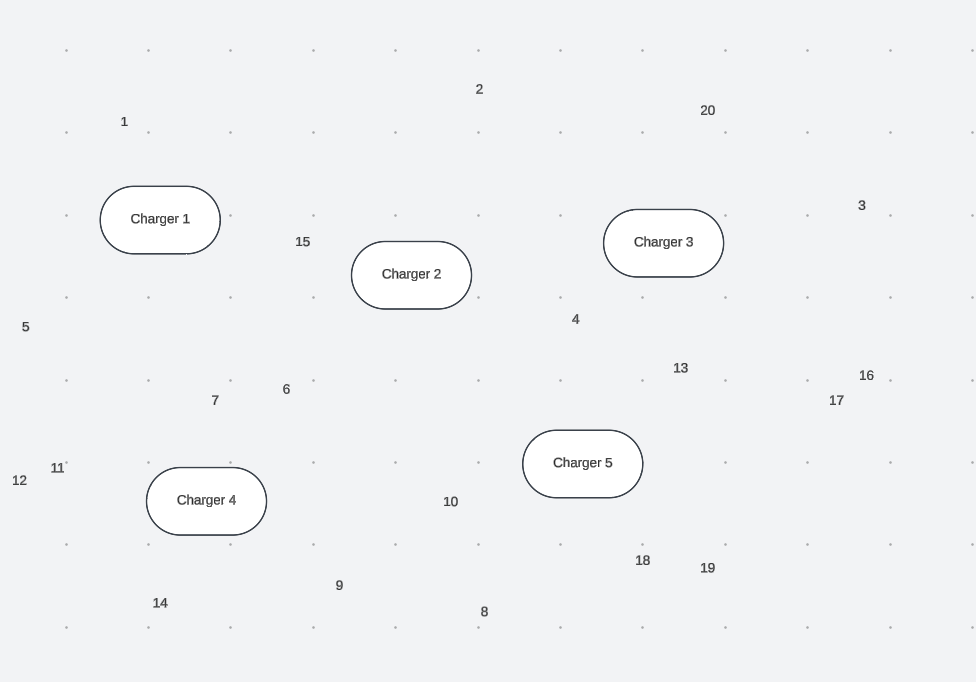


In [1]:
!pip install cplex
!pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671351 sha256=b9b4bc5cb72c0abaad3a95fe94e4d72fc5c7ed24a87ef4f498103982988ceb0f
  Stored in directory: /root/.cache/pip/wheels/3b/e5/00/0bf0173d67188fe73a13e3a61412b3f975f60205e3fab93a69
Successfully built docplex


In [2]:
from docplex.mp.model import Model

model = Model(name='E-scooter Assignment Problem')

In [3]:
num_scooters = 20
num_chargers = 5

# Sets

# Set of E-scooters in the system
V = range(1, num_scooters + 1)

# Set of chargers in the system
S = range(1, num_chargers + 1)


# Data

# Distance between e-scooter i and charger k

d = {(1, 1): 1.1,   (1, 2): 3.0,   (1, 3): 6.3,   (1, 4): 4.5,   (1,5): 9.8,
     (2, 1): 2.5,   (2, 2): 2.0,   (2, 3): 2.7,   (2, 4): 8.0,   (2,5): 5.7,
     (3, 1): 8.6,   (3, 2): 5.0,   (3, 3): 2.3,   (3, 4): 11.5,  (3,5): 6.3,
     (4, 1): 3.9,   (4, 2): 2.1,   (4, 3): 1.3,   (4, 4): 6.5,   (4,5): 1.8,
     (5, 1): 1.8,   (5, 2): 3.3,   (5, 3): 7.5,   (5, 4): 4.0,   (5,5): 8.1,
     (6, 1): 3.4,   (6, 2): 1.5,   (6, 3): 4.7,   (6, 4): 2.4,   (6,5): 3.5,
     (7, 1): 3.5,   (7, 2): 2.5,   (7, 3): 5.5,   (7, 4): 1.1,   (7,5): 4.3,
     (8, 1): 7.0,   (8, 2): 4.6,   (8, 3): 4.7,   (8, 4): 4.4,   (8,5): 2.9,
     (9, 1): 6.2,   (9, 2): 3.6,   (9, 3): 5.5,   (9, 4): 2.2,   (9,5): 4.2,
     (10, 1): 5.8,  (10, 2): 2.6,  (10, 3): 3.9,  (10, 4): 3.0,  (10,5): 1.6,
     (11, 1): 3.2,  (11, 2): 4.7,  (11, 3): 7.4,  (11, 4): 1.8,  (11,5): 6.4,
     (12, 1): 3.4,  (12, 2): 5.0,  (12, 3): 7.6,  (12, 4): 2.0,  (12,5): 6.6,
     (13, 1): 5.4,  (13, 2): 3.3,  (13, 3): 1.3,  (13, 4): 7.2,  (13,5): 2.1,
     (14, 1): 5.2,  (14, 2): 5.0,  (14, 3): 7.0,  (14, 4): 1.3,  (14,5): 6.8,
     (15, 1): 1.3,  (15, 2): 1.1,  (15, 3): 4.0,  (15, 4): 4.0,  (15,5): 5.9,
     (16, 1): 7.3,  (16, 2): 5.3,  (16, 3): 2.7,  (16, 4): 9.4,  (16,5): 4.3,
     (17, 1): 7.2,  (17, 2): 5.0,  (17, 3): 2.8,  (17, 4): 9.2,  (17,5): 3.5,
     (18, 1): 6.9,  (18, 2): 4.2,  (18, 3): 3.7,  (18, 4): 6.1,  (18,5): 2.1,
     (19, 1): 7.1,  (19, 2): 4.8,  (19, 3): 3.8,  (19, 4): 6.4,  (19,5): 2.8,
     (20, 1): 4.0,  (20, 2): 3.9,  (20, 3): 1.5,  (20, 4): 10.7,  (20,5): 5.6}

# Maximum number of e-scooters assigned to charger k
D = {1: 5, 2: 4, 3: 4, 4: 5, 5: 4}

# Penalty of using charger k
b = {1: 2, 2: 3, 3: 2, 4: 3, 5: 2}

# Total Investment for joining all chargers
B = 15

In [4]:
# Decision variables

# Binary variable indicating if e-scooter i is assigned to charger k
z = model.binary_var_dict([(i, k) for i in V for k in S], name='z')

# Binary variable indicating if charger k is ready to be used
y = model.binary_var_dict([(k, k) for k in S], name='y')


In [5]:
# Objective function

# Minimize the total cost of the system
model.minimize(model.sum(d[i, k] * z[i, k] for i in V for k in S) + model.sum(b[k] * y[k,k] for k in S))

In [6]:
# Constraints

# Each e-scooter must be assigned to exactly one charger
model.add_constraints(model.sum(z[i, k] for k in S) == 1 for i in V)

# No e-scooter i is assigned to charger k unless k is ready to work
model.add_constraints(z[i, k] <= y[k, k] for i in V for k in S)

# Total costs of joining S chargers must be less than B
model.add_constraint(model.sum(y[k, k] for k in S) <= B)

# Assigned number of e-scooters to charger k must be less than D
model.add_constraints(model.sum(z[i, k] for i in V) <= D[k]*y[k, k] for k in S)

# Assignment is either 0 or 1
model.add_constraints(z[i, k] >= 0 for i in V for k in S)

[docplex.mp.LinearConstraint[](z_1_1,GE,0),
 docplex.mp.LinearConstraint[](z_1_2,GE,0),
 docplex.mp.LinearConstraint[](z_1_3,GE,0),
 docplex.mp.LinearConstraint[](z_1_4,GE,0),
 docplex.mp.LinearConstraint[](z_1_5,GE,0),
 docplex.mp.LinearConstraint[](z_2_1,GE,0),
 docplex.mp.LinearConstraint[](z_2_2,GE,0),
 docplex.mp.LinearConstraint[](z_2_3,GE,0),
 docplex.mp.LinearConstraint[](z_2_4,GE,0),
 docplex.mp.LinearConstraint[](z_2_5,GE,0),
 docplex.mp.LinearConstraint[](z_3_1,GE,0),
 docplex.mp.LinearConstraint[](z_3_2,GE,0),
 docplex.mp.LinearConstraint[](z_3_3,GE,0),
 docplex.mp.LinearConstraint[](z_3_4,GE,0),
 docplex.mp.LinearConstraint[](z_3_5,GE,0),
 docplex.mp.LinearConstraint[](z_4_1,GE,0),
 docplex.mp.LinearConstraint[](z_4_2,GE,0),
 docplex.mp.LinearConstraint[](z_4_3,GE,0),
 docplex.mp.LinearConstraint[](z_4_4,GE,0),
 docplex.mp.LinearConstraint[](z_4_5,GE,0),
 docplex.mp.LinearConstraint[](z_5_1,GE,0),
 docplex.mp.LinearConstraint[](z_5_2,GE,0),
 docplex.mp.LinearConstraint[](z

In [7]:
model.solve()

model.print_solution()

objective: 51.900
status: OPTIMAL_SOLUTION(2)
  z_1_1=1
  z_2_2=1
  z_3_3=1
  z_4_2=1
  z_5_1=1
  z_6_2=1
  z_7_4=1
  z_8_5=1
  z_9_4=1
  z_10_2=1
  z_11_4=1
  z_12_4=1
  z_13_3=1
  z_14_4=1
  z_15_1=1
  z_16_3=1
  z_17_5=1
  z_18_5=1
  z_19_5=1
  z_20_3=1
  y_1_1=1
  y_2_2=1
  y_3_3=1
  y_4_4=1
  y_5_5=1
